In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

BELOW IS THE WIN RATES, AND AFFECT OF THEM DEPENDING ON THE SITUATION, HOME OR AWAY

In [4]:
df = pd.read_csv('./data/processed/games.csv')
# home_win_rate = df[df['home_or_away'] == 'HOME']['result'].value_counts(normalize=True)['Win']
# home_loss_rate = df[df['home_or_away'] == 'HOME']['result'].value_counts(normalize=True)['loss']
# away_win_rate = df[df['home_or_away'] == 'AWAY']['result'].value_counts(normalize=True)['Win']
# away_loss_rate = df[df['home_or_away'] == 'AWAY']['result'].value_counts(normalize=True)['loss']

p = df[ df['result'] == 'Win' ]['home_or_away'].value_counts(normalize=True)['HOME']
q = df[ df['result'] == 'loss' ]['home_or_away'].value_counts(normalize=True)['HOME']
p+q

1.0033467351441674

CORELATION BETWEEN: shotsOnGoalFor and goalsFor

Coefficient of correlation: 0.147
Coefficient of determination (R-squared): 0.022


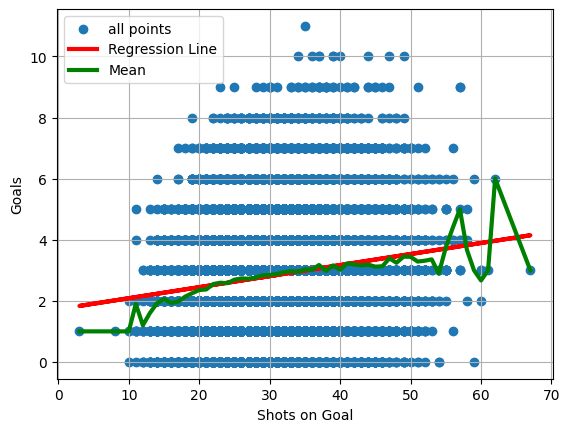

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, linregress

df = pd.read_csv('./data/processed/games.csv')
shots_on_goals = df['shotsOnGoalFor']
goals = df['goalsFor']

# Calculate correlation and the p-value
corr, _ = pearsonr(shots_on_goals, goals)
print('Coefficient of correlation: %.3f' % corr)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(shots_on_goals, goals)

# Calculate R-squared
r_squared = r_value**2
print('Coefficient of determination (R-squared): %.3f' % r_squared)

# Compute y-values for the regression line
regression_line_y = slope * shots_on_goals + intercept

# Create scatter plot
plt.scatter(shots_on_goals, goals)

# Plot regression line
plt.plot(shots_on_goals, regression_line_y, color='red', linewidth=3)

# Add labels, title and grid
plt.xlabel('Shots on Goal')
plt.ylabel('Goals')
plt.grid(True)

# Compute the mean of goals for each number of shots on goal
means = df.groupby('shotsOnGoalFor')['goalsFor'].mean()

# Plot the mean of goals for each number of shots on goal
plt.plot(means.index, means, color='green', linewidth=3)

plt.legend(['all points', 'Regression Line', 'Mean'], loc='upper left')
# Show the plot
plt.show()

A DISTRIBUTION OF GAMESCORE(OVER ALL GOODNESS OF A PLAYER) OVER THIER AGE

Text(0, 0.5, 'Game Score')

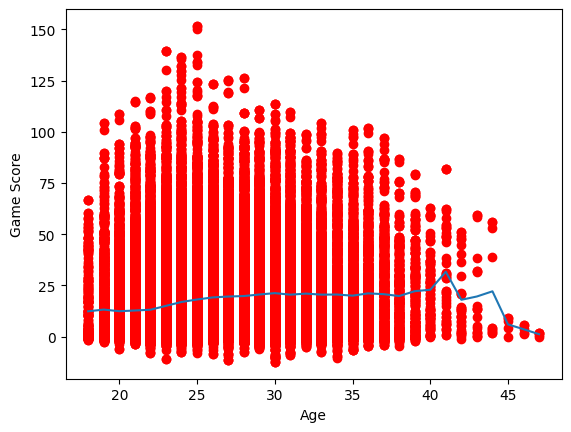

In [6]:
df = pd.read_csv('./data/processed/skaters.csv')

scores = []
ages   = []
for age in range(df['age'].min(), df['age'].max()+1):
    score = df[df['age'] == age]['gameScore']
    scores.append(score.mean())
    ages.append(age)

plt.plot(df['age'], df['gameScore'], 'ro') # all dots
plt.plot(ages, scores) # mean at each year
plt.xlabel('Age')
plt.ylabel('Game Score')

A DISTRIBUTION OF GAMESCORE FOR EACH AGE

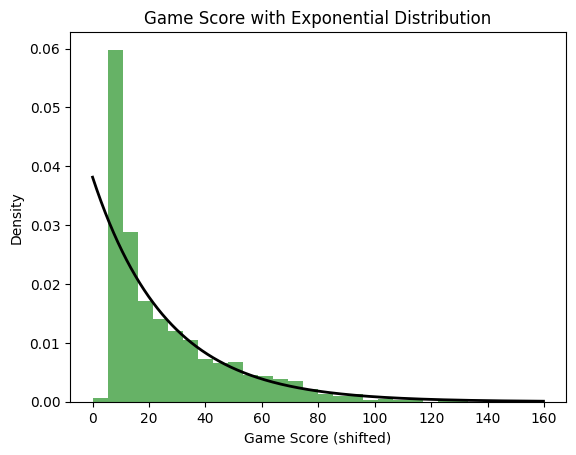

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

AGE = 25

df = pd.read_csv('./data/processed/skaters.csv')

def age_gameScore(age, df):
    players = df[df['age'] == age]
    return players['gameScore']

scores = age_gameScore(AGE, df)

# Shift the scores so they start at 0
scores_shifted = scores - np.min(scores)

# Fit an exponential distribution to the shifted data
params = expon.fit(scores_shifted)

# Plot the histogram of the shifted data
plt.hist(scores_shifted, bins=30, density=True, alpha=0.6, color='g')

# Plot the PDF of the fitted Exponential distribution
x = np.linspace(0, np.max(scores_shifted), 10000)
p = expon.pdf(x, *params)
plt.plot(x, p, 'k', linewidth=2)

plt.title("Game Score with Exponential Distribution")
plt.xlabel("Game Score (shifted)")
plt.ylabel("Density")

plt.show()

In [52]:
import pandas as pd

eval(pd.read_csv('./data/processed/__games.csv').head()['playerIds'][0])

([8456850,
  8468927,
  8459461,
  8457981,
  8470621,
  8470543,
  8470612,
  8468095,
  8468506,
  8459587,
  8467400,
  8457261,
  8459424,
  8465192,
  8458517,
  8468635,
  8467478,
  8459427,
  8470843,
  8473646],
 [8462044])